## The experiments for the paper, 
## "[Class Name Recommendation based on Graph Embedding of Program Elements](https://kuri8ive.github.io/preprints/apsec2019.pdf)"

1. Recommendation before a class is used
1. Recommendation after a class is used
1. Where does the proposed work well?

About the details of these experiments, please refer to the paper.

### Settings

In [1]:
# -*- coding: utf-8 -*-

import sys
import os
import statistics
import random

import optuna
from IPython.core.debugger import Pdb

from core import Model, DataProcessor, Trainer, Recommender


sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
THIS_FILE_DIR_PATH = os.getcwd()

/home/kurimoto/venvs/reco/lib/python3.6/site-packages/chainer/backends/cuda.py:98: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cudnn).
  'cuDNN is not enabled.\n'


### Define functions

In [2]:
def prepare_model(index, embedding_dim=250, alpha=0.6, beta=0.2, gamma=0.8,
                  delta=0.1, initial_learn_rate=0.25, epochs=30, decay='exp99',
                  target_negative_weight=0.1, negative_sample_num=5):
    
    is_split_by_project_data = 1
    #     int(input('How to split data？ if random -> 1， if per project -> 2\n>'))
    data_type = 'random' if is_split_by_project_data == 1 else 'project'
    input_dir = 'data/input' if is_split_by_project_data == 1 else 'data/project_input'
    output_dir = 'data/output' if is_split_by_project_data == 1 else 'data/project_output'

    model_name = 'dim-{}_alpha-{}_beta-{}_gamma-{}_delta-{}_lr-{}_epochs-{}_weight-{}_decay-{}_data_type-{}_negative-sample-num-{}_{}.model' \
        .format(embedding_dim, alpha, beta, gamma, delta, initial_learn_rate, epochs, target_negative_weight, decay, data_type, negative_sample_num, index)
    input_path = os.path.join(THIS_FILE_DIR_PATH, input_dir, str(index))
    output_path = os.path.join(THIS_FILE_DIR_PATH, output_dir, str(index))

    model = Model()
    model.model_name = model_name
    model.embedding_dim = embedding_dim
    model.alpha = alpha
    model.beta = beta
    model.gamma = gamma
    model.delta = delta
    model.initial_learn_rate = initial_learn_rate
    model.epochs = epochs
    model.decay = decay
    model.target_negative_weight = target_negative_weight
    model.cv_index = index
    model.input_path = input_path
    model.output_path = output_path
    model.negative_sample_num = negative_sample_num

    return model

def trans_model_for_hsearch(trial, model):
    model.embedding_dim = trial.suggest_categorical('embedding_dim', [200, 250])
    model.alpha = trial.suggest_categorical('alpha', [0.6, 0.5])
    model.beta = trial.suggest_categorical('beta', [0.2, 0.3])
    model.gamma = trial.suggest_categorical('gamma', [0.7, 0.8])
    model.delta = trial.suggest_categorical('delta', [0.1, 0.2])
    model.initial_learn_rate = trial.suggest_categorical('initial_learn_rate', [0.1, 0.25, 0.5])
    model.epochs = trial.suggest_categorical('epochs', [15, 30, 50])
    model.decay = trial.suggest_categorical('decay', ['exp999', 'exp99'])
    model.target_negative_weight = trial.suggest_categorical('target_negative_weight', [0.1, 0.001])
    model.negative_sample_num = trial.suggest_categorical('negative_sample_num', [5, 10])
    
    return model


In [3]:
model_for_hsearch_1 = DataProcessor(prepare_model(1)).pre_process()
print('model_for_hsearch_1 prepared\n-----')
model_for_hsearch_2 = DataProcessor(prepare_model(2)).pre_process()
print('model_for_hsearch_2 prepared\n-----')
model_for_hsearch_3 = DataProcessor(prepare_model(3)).pre_process()
print('model_for_hsearch_3 prepared\n-----')
model_for_hsearch_4 = DataProcessor(prepare_model(4)).pre_process()
print('model_for_hsearch_4 prepared\n-----')
model_for_hsearch_5 = DataProcessor(prepare_model(5)).pre_process()
print('model_for_hsearch_5 prepared\n-----')

models_for_hsearch = [model_for_hsearch_1, model_for_hsearch_2, 
                                           model_for_hsearch_3, model_for_hsearch_4, model_for_hsearch_5]

def objective(trial):
    final_loss_sum = 0.0
    tmp_model = trans_model_for_hsearch(trial, random.choice(models_for_hsearch))
    final_loss = Trainer(tmp_model).fit(include_be_used=True, is_test=False)
    final_loss_sum += final_loss
    return final_loss_sum

data process started


100%|██████████| 12/12 [00:00<00:00, 15.04it/s]
24247it [00:05, 4787.25it/s]
265133it [00:13, 19113.47it/s]
108213it [00:01, 78161.44it/s]
33356it [00:13, 2446.60it/s]
341185it [00:26, 12954.22it/s]
141411it [00:02, 59595.99it/s]


data process finished
elapsed_time for data process : 91.3527102470398
model_for_hsearch_1 prepared
-----
data process started


100%|██████████| 12/12 [00:00<00:00, 14.66it/s]
24266it [00:04, 4878.45it/s]
270126it [00:13, 19827.65it/s]
109152it [00:01, 81398.72it/s]
33359it [00:12, 2698.26it/s]
352951it [00:25, 13648.69it/s]
140559it [00:02, 63428.09it/s]


data process finished
elapsed_time for data process : 87.51743531227112
model_for_hsearch_2 prepared
-----
data process started


100%|██████████| 12/12 [00:00<00:00, 14.65it/s]
24367it [00:04, 4933.16it/s]
267082it [00:13, 20031.99it/s]
110214it [00:01, 82353.26it/s]
33363it [00:12, 2710.04it/s]
351132it [00:25, 13651.24it/s]
141507it [00:02, 63430.76it/s]


data process finished
elapsed_time for data process : 88.18154096603394
model_for_hsearch_3 prepared
-----
data process started


100%|██████████| 12/12 [00:00<00:00, 14.67it/s]
24280it [00:04, 4997.82it/s]
261265it [00:13, 20043.66it/s]
106711it [00:01, 81542.68it/s]
33338it [00:12, 2701.94it/s]
350893it [00:25, 13645.13it/s]
141810it [00:02, 63855.07it/s]


data process finished
elapsed_time for data process : 87.65892934799194
model_for_hsearch_4 prepared
-----
data process started


100%|██████████| 12/12 [00:00<00:00, 14.75it/s]
24587it [00:05, 4738.08it/s]
274409it [00:14, 19552.63it/s]
111755it [00:01, 80267.59it/s]
33341it [00:17, 1919.11it/s]
349330it [00:26, 13384.78it/s]
141635it [00:02, 62629.61it/s]


data process finished
elapsed_time for data process : 92.79274797439575
model_for_hsearch_5 prepared
-----


### hypar parameter search

In [4]:
study = optuna.create_study()
study.optimize(objective, n_trials=1)


training started


100%|██████████| 15/15 [02:21<00:00,  9.42s/it]


elapsed_time for training : 141.47027325630188


[I 2019-11-23 15:03:48,059] Finished a trial resulted in value: 119754.5078125. Current best value is 119754.5078125 with parameters: {'embedding_dim': 250, 'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8, 'delta': 0.1, 'initial_learn_rate': 0.1, 'epochs': 15, 'decay': 'exp99', 'target_negative_weight': 0.001, 'negative_sample_num': 10}.


In [5]:
best_params = study.best_params
best_params

{'embedding_dim': 250,
 'alpha': 0.5,
 'beta': 0.3,
 'gamma': 0.8,
 'delta': 0.1,
 'initial_learn_rate': 0.1,
 'epochs': 15,
 'decay': 'exp99',
 'target_negative_weight': 0.001,
 'negative_sample_num': 10}

### Experiment 1 calculation

In [6]:
accuracy = nodes = edges = 0.0

success_have_inside = [[] for _ in range(10)]
success_used_outside = success_have_inside[:]
success_extended = success_have_inside[:]
success_have_methods = success_have_inside[:]
success_have_fields = success_have_inside[:]
failed_have_inside = []
failed_used_outside = []
failed_extended = []
failed_have_methods = []
failed_have_fields = []

top_k = 10
cross_validation_split_num = 5

success_each_ranking_before = [[] for _ in range(cross_validation_split_num)]
num_of_recommend_class_before = [0 for _ in range(cross_validation_split_num)]
success_if_related_all_before = [0.0 for _ in range(cross_validation_split_num)]
success_if_related_not_all_before = [0.0 for _ in range(cross_validation_split_num)]

for index in range(cross_validation_split_num):
    print(f'index{str(index + 1)} start')
    model = prepare_model(index + 1, best_params['embedding_dim'], best_params['alpha'],
                          best_params['beta'], best_params['gamma'], best_params['delta'],
                          best_params['initial_learn_rate'], best_params['epochs'], best_params['decay'],
                          best_params['target_negative_weight'], best_params['negative_sample_num'])
    model_name = model.model_name
    preprocessed_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/preprocessed_model', model_name)
    train_fit_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/train_fit_model', model_name)
    test_fit_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/test_fit_model', model_name)

    DataProcessor(model).pre_process()
    Trainer(model).fit(include_be_used=True, is_test=False)
    Trainer(model).fit(include_be_used=False, is_test=True)
    model.save(test_fit_model_path)
    Recommender(model).recommend(top_k=top_k)

    print('accuracy -> {} at index {}'.format(model.accuracy, index+1))
    accuracy += model.accuracy
    nodes += model.num_of_all_nodes
    edges += model.num_of_all_edges
    success_each_ranking_before[index].extend(model.recommend_success_count_in_each_ranking)
    num_of_recommend_class_before[index] = model.num_of_recommend_class
    success_if_related_all_before[index] = model.success_if_related_all
    success_if_related_not_all_before[index] = model.success_if_related_not_all

    for i in range(top_k):
        success_have_inside[i].extend(model.number_data_1st_10th_and_failed[i]['have_inside'])
        success_used_outside[i].extend(model.number_data_1st_10th_and_failed[i]['used_outside'])
        success_extended[i].extend(model.number_data_1st_10th_and_failed[i]['extended'])
        success_have_methods[i].extend(model.number_data_1st_10th_and_failed[i]['have_methods'])
        success_have_fields[i].extend(model.number_data_1st_10th_and_failed[i]['have_fields'])

    failed_have_inside.extend(model.number_data_1st_10th_and_failed[top_k]['have_inside'])
    failed_used_outside.extend(model.number_data_1st_10th_and_failed[top_k]['used_outside'])
    failed_extended.extend(model.number_data_1st_10th_and_failed[top_k]['extended'])
    failed_have_methods.extend(model.number_data_1st_10th_and_failed[top_k]['have_methods'])
    failed_have_fields.extend(model.number_data_1st_10th_and_failed[top_k]['have_fields'])

avg_acc_before = accuracy/5
avg_acc_before


index1 start
data process started


100%|██████████| 12/12 [00:00<00:00, 14.86it/s]
24247it [00:10, 2339.55it/s]
265133it [00:13, 19798.90it/s]
108213it [00:01, 81493.27it/s]
33356it [00:12, 2747.99it/s]
341185it [00:25, 13442.77it/s]
141411it [00:02, 63254.92it/s]


data process finished
elapsed_time for data process : 87.58842086791992
training started


100%|██████████| 15/15 [02:14<00:00,  8.96s/it]


elapsed_time for training : 134.39447736740112
training started


100%|██████████| 15/15 [01:57<00:00,  7.80s/it]


elapsed_time for training : 122.27177262306213
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_1.model
recommendation started
train_classes_shape -> (27526, 250)
reco_class_shape -> (9109, 250)


9109it [00:09, 946.20it/s]


success_if_related_all : 0.331333803810868
success_if_related_not_all : 0.31123505976095617
recommendation finished
elapsed_time for recommendation : 25.209245681762695
accuracy -> 0.3174881984850148 at index 1
index2 start
data process started


100%|██████████| 12/12 [00:01<00:00, 11.55it/s]
24266it [00:05, 4653.59it/s]
270126it [00:14, 19109.87it/s]
109152it [00:01, 76481.32it/s]
33359it [00:12, 2628.07it/s]
352951it [00:26, 13098.42it/s]
140559it [00:02, 59530.84it/s]


data process finished
elapsed_time for data process : 99.59822082519531
training started


100%|██████████| 15/15 [02:33<00:00, 10.25s/it]


elapsed_time for training : 153.74781203269958
training started


100%|██████████| 15/15 [02:10<00:00,  8.67s/it]


elapsed_time for training : 135.44885873794556
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_2.model
recommendation started
train_classes_shape -> (27478, 250)
reco_class_shape -> (9093, 250)


9093it [00:09, 942.29it/s]


success_if_related_all : 0.3303183791606368
success_if_related_not_all : 0.3017854321377785
recommendation finished
elapsed_time for recommendation : 24.756253480911255
accuracy -> 0.31045859452325963 at index 2
index3 start
data process started


100%|██████████| 12/12 [00:01<00:00, 11.99it/s]
24367it [00:05, 4770.27it/s]
267082it [00:13, 19267.09it/s]
110214it [00:01, 76172.09it/s]
33363it [00:12, 2650.17it/s]
351132it [00:26, 13238.18it/s]
141507it [00:02, 60438.26it/s]


data process finished
elapsed_time for data process : 98.82463812828064
training started


100%|██████████| 15/15 [02:25<00:00,  9.70s/it]


elapsed_time for training : 145.58357214927673
training started


100%|██████████| 15/15 [01:58<00:00,  7.91s/it]


elapsed_time for training : 123.92385292053223
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_3.model
recommendation started
train_classes_shape -> (27603, 250)
reco_class_shape -> (8996, 250)


8996it [00:09, 946.68it/s]


success_if_related_all : 0.3475836431226766
success_if_related_not_all : 0.3011417697431018
recommendation finished
elapsed_time for recommendation : 24.530369758605957
accuracy -> 0.315028901734104 at index 3
index4 start
data process started


100%|██████████| 12/12 [00:00<00:00, 12.24it/s]
24280it [00:04, 4941.84it/s]
261265it [00:13, 19744.70it/s]
106711it [00:01, 79592.58it/s]
33338it [00:12, 2685.95it/s]
350893it [00:26, 13345.86it/s]
141810it [00:02, 61232.01it/s]


data process finished
elapsed_time for data process : 88.32321786880493
training started


100%|██████████| 15/15 [02:37<00:00, 10.53s/it]


elapsed_time for training : 158.0095009803772
training started


100%|██████████| 15/15 [02:04<00:00,  8.32s/it]


elapsed_time for training : 129.9398376941681
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_4.model
recommendation started
train_classes_shape -> (27569, 250)
reco_class_shape -> (9058, 250)


9058it [00:09, 959.30it/s]


success_if_related_all : 0.33890469416785207
success_if_related_not_all : 0.29554915145693245
recommendation finished
elapsed_time for recommendation : 24.555268049240112
accuracy -> 0.30900861117244427 at index 4
index5 start
data process started


100%|██████████| 12/12 [00:00<00:00, 12.21it/s]
24587it [00:05, 4724.74it/s]
274409it [00:14, 19479.94it/s]
111755it [00:01, 77984.92it/s]
33341it [00:12, 2688.68it/s]
349330it [00:26, 13279.96it/s]
141635it [00:02, 60856.96it/s]


data process finished
elapsed_time for data process : 97.84762454032898
training started


100%|██████████| 15/15 [02:34<00:00, 10.30s/it]


elapsed_time for training : 154.5160849094391
training started


100%|██████████| 15/15 [01:59<00:00,  7.96s/it]


elapsed_time for training : 124.86933875083923
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_5.model
recommendation started
train_classes_shape -> (27997, 250)
reco_class_shape -> (8754, 250)


8754it [00:09, 949.00it/s]


success_if_related_all : 0.35844155844155845
success_if_related_not_all : 0.3251361610826869
recommendation finished
elapsed_time for recommendation : 24.09805703163147
accuracy -> 0.33538953621201734 at index 5


0.31747476842536804

### Experiment 2 calculation

In [7]:
accuracy = nodes = edges = 0.0

success_have_inside = [[] for _ in range(10)]
success_used_outside = [[] for _ in range(10)]
success_extended = [[] for _ in range(10)]
success_have_methods = [[] for _ in range(10)]
success_have_fields = [[] for _ in range(10)]
failed_have_inside = []
failed_used_outside = []
failed_extended = []
failed_have_methods = []
failed_have_fields = []

top_k = 10
cross_validation_split_num = 5

success_each_ranking_after = [[] for _ in range(cross_validation_split_num)]
num_of_recommend_class_after = [0 for _ in range(cross_validation_split_num)]
success_if_related_all_after = [0.0 for _ in range(cross_validation_split_num)]
success_if_related_not_all_after = [0.0 for _ in range(cross_validation_split_num)]

for index in range(cross_validation_split_num):
    print(f'index{str(index + 1)} start')
    model = prepare_model(index + 1, best_params['embedding_dim'], best_params['alpha'],
                          best_params['beta'], best_params['gamma'], best_params['delta'],
                          best_params['initial_learn_rate'], best_params['epochs'], best_params['decay'],
                          best_params['target_negative_weight'], best_params['negative_sample_num'])
    model_name = model.model_name
    preprocessed_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/preprocessed_model', model_name)
    train_fit_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/train_fit_model', model_name)
    test_fit_model_path = os.path.join(THIS_FILE_DIR_PATH, os.pardir, 'data/model/test_fit_model', model_name)

    DataProcessor(model).pre_process()
    Trainer(model).fit(include_be_used=True, is_test=False)
    Trainer(model).fit(include_be_used=True, is_test=True)
    model.save(test_fit_model_path)
    Recommender(model).recommend(top_k=top_k)

    print('accuracy -> {} at index {}'.format(model.accuracy, index+1))
    accuracy += model.accuracy
    nodes += model.num_of_all_nodes
    edges += model.num_of_all_edges
    success_each_ranking_after[index].extend(model.recommend_success_count_in_each_ranking)
    num_of_recommend_class_after[index] = model.num_of_recommend_class
    success_if_related_all_after[index] = model.success_if_related_all
    success_if_related_not_all_after[index] = model.success_if_related_not_all

    for i in range(top_k):
        success_have_inside[i].extend(model.number_data_1st_10th_and_failed[i]['have_inside'])
        success_used_outside[i].extend(model.number_data_1st_10th_and_failed[i]['used_outside'])
        success_extended[i].extend(model.number_data_1st_10th_and_failed[i]['extended'])
        success_have_methods[i].extend(model.number_data_1st_10th_and_failed[i]['have_methods'])
        success_have_fields[i].extend(model.number_data_1st_10th_and_failed[i]['have_fields'])

    failed_have_inside.extend(model.number_data_1st_10th_and_failed[top_k]['have_inside'])
    failed_used_outside.extend(model.number_data_1st_10th_and_failed[top_k]['used_outside'])
    failed_extended.extend(model.number_data_1st_10th_and_failed[top_k]['extended'])
    failed_have_methods.extend(model.number_data_1st_10th_and_failed[top_k]['have_methods'])
    failed_have_fields.extend(model.number_data_1st_10th_and_failed[top_k]['have_fields'])

avg_acc_after = accuracy/5
avg_acc_after


index1 start
data process started


100%|██████████| 12/12 [00:00<00:00, 14.30it/s]
24247it [00:04, 4969.47it/s]
265133it [00:19, 13602.56it/s]
108213it [00:01, 82364.35it/s]
33356it [00:12, 2763.19it/s]
341185it [00:25, 13472.31it/s]
141411it [00:02, 63637.75it/s]


data process finished
elapsed_time for data process : 88.91525602340698
training started


100%|██████████| 15/15 [02:17<00:00,  9.15s/it]


elapsed_time for training : 137.32696509361267
training started


100%|██████████| 15/15 [01:57<00:00,  7.84s/it]


elapsed_time for training : 122.89832425117493
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_1.model
recommendation started
train_classes_shape -> (27526, 250)
reco_class_shape -> (9109, 250)


9109it [00:09, 998.51it/s] 


success_if_related_all : 0.39908256880733944
success_if_related_not_all : 0.36780876494023906
recommendation finished
elapsed_time for recommendation : 24.302038431167603
accuracy -> 0.37753869799099793 at index 1
index2 start
data process started


100%|██████████| 12/12 [00:01<00:00, 11.95it/s]
24266it [00:05, 4739.07it/s]
270126it [00:13, 19471.31it/s]
109152it [00:01, 78326.14it/s]
33359it [00:12, 2666.60it/s]
352951it [00:26, 13272.80it/s]
140559it [00:02, 59902.21it/s]


data process finished
elapsed_time for data process : 97.64321160316467
training started


100%|██████████| 15/15 [02:40<00:00, 10.68s/it]


elapsed_time for training : 160.15749049186707
training started


100%|██████████| 15/15 [02:04<00:00,  8.33s/it]


elapsed_time for training : 130.2689266204834
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_2.model
recommendation started
train_classes_shape -> (27478, 250)
reco_class_shape -> (9093, 250)


9093it [00:09, 997.66it/s] 


success_if_related_all : 0.40123010130246023
success_if_related_not_all : 0.36467056407015325
recommendation finished
elapsed_time for recommendation : 24.234286069869995
accuracy -> 0.37578356977895083 at index 2
index3 start
data process started


100%|██████████| 12/12 [00:00<00:00, 12.01it/s]
24367it [00:13, 1825.22it/s]
267082it [00:13, 19323.08it/s]
110214it [00:01, 77944.02it/s]
33363it [00:12, 2654.26it/s]
351132it [00:26, 13215.30it/s]
141507it [00:02, 60530.46it/s]


data process finished
elapsed_time for data process : 97.63396143913269
training started


100%|██████████| 15/15 [02:30<00:00, 10.05s/it]


elapsed_time for training : 150.79953360557556
training started


100%|██████████| 15/15 [02:01<00:00,  8.07s/it]


elapsed_time for training : 126.3682792186737
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_3.model
recommendation started
train_classes_shape -> (27603, 250)
reco_class_shape -> (8996, 250)


8996it [00:08, 1002.88it/s]


success_if_related_all : 0.41821561338289964
success_if_related_not_all : 0.3655248969235649
recommendation finished
elapsed_time for recommendation : 24.003393411636353
accuracy -> 0.38128056914184083 at index 3
index4 start
data process started


100%|██████████| 12/12 [00:00<00:00, 12.41it/s]
24280it [00:04, 4895.35it/s]
261265it [00:13, 19605.21it/s]
106711it [00:01, 78749.51it/s]
33338it [00:12, 2679.05it/s]
350893it [00:35, 9969.20it/s] 
141810it [00:02, 60723.18it/s]


data process finished
elapsed_time for data process : 96.95337319374084
training started


100%|██████████| 15/15 [02:27<00:00,  9.82s/it]


elapsed_time for training : 147.29729199409485
training started


100%|██████████| 15/15 [02:01<00:00,  8.09s/it]


elapsed_time for training : 126.44070935249329
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_4.model
recommendation started
train_classes_shape -> (27569, 250)
reco_class_shape -> (9058, 250)


9058it [00:09, 1002.63it/s]


success_if_related_all : 0.3886913229018492
success_if_related_not_all : 0.35830931796349663
recommendation finished
elapsed_time for recommendation : 24.148689031600952
accuracy -> 0.36774122322808567 at index 4
index5 start
data process started


100%|██████████| 12/12 [00:00<00:00, 12.48it/s]
24587it [00:05, 4747.81it/s]
274409it [00:14, 19567.55it/s]
111755it [00:01, 80043.85it/s]
33341it [00:12, 2698.96it/s]
349330it [00:25, 13529.25it/s]
141635it [00:02, 62319.44it/s]


data process finished
elapsed_time for data process : 91.59060907363892
training started


100%|██████████| 15/15 [02:19<00:00,  9.33s/it]


elapsed_time for training : 140.00790643692017
training started


100%|██████████| 15/15 [01:57<00:00,  7.83s/it]


elapsed_time for training : 122.9627935886383
Trained model object was saved to /home/kurimoto/apsec-test/../data/model/test_fit_model/dim-250_alpha-0.5_beta-0.3_gamma-0.8_delta-0.1_lr-0.1_epochs-15_weight-0.001_decay-exp99_data_type-random_negative-sample-num-10_5.model
recommendation started
train_classes_shape -> (27997, 250)
reco_class_shape -> (8754, 250)


8754it [00:08, 1009.62it/s]


success_if_related_all : 0.41447124304267163
success_if_related_not_all : 0.3850470374649282
recommendation finished
elapsed_time for recommendation : 23.53250765800476
accuracy -> 0.39410555174777245 at index 5


0.37928992237752956

In [8]:
success_before = [0.0 for _ in range(top_k)]
success_after = [0.0 for _ in range(top_k)]

for validate in range(cross_validation_split_num):
    for index in range(top_k):
        success_before[index] += \
        success_each_ranking_before[validate][index]\
        / num_of_recommend_class_before[validate]
        success_after[index] += success_each_ranking_after[validate][index] / num_of_recommend_class_after[validate]
result_success_before =list(map(lambda x: x / 5, success_before))
result_success_after = list(map(lambda x: x / 5, success_after))


### Results for Experiment 1 & 2

<IPython.core.display.Javascript object>


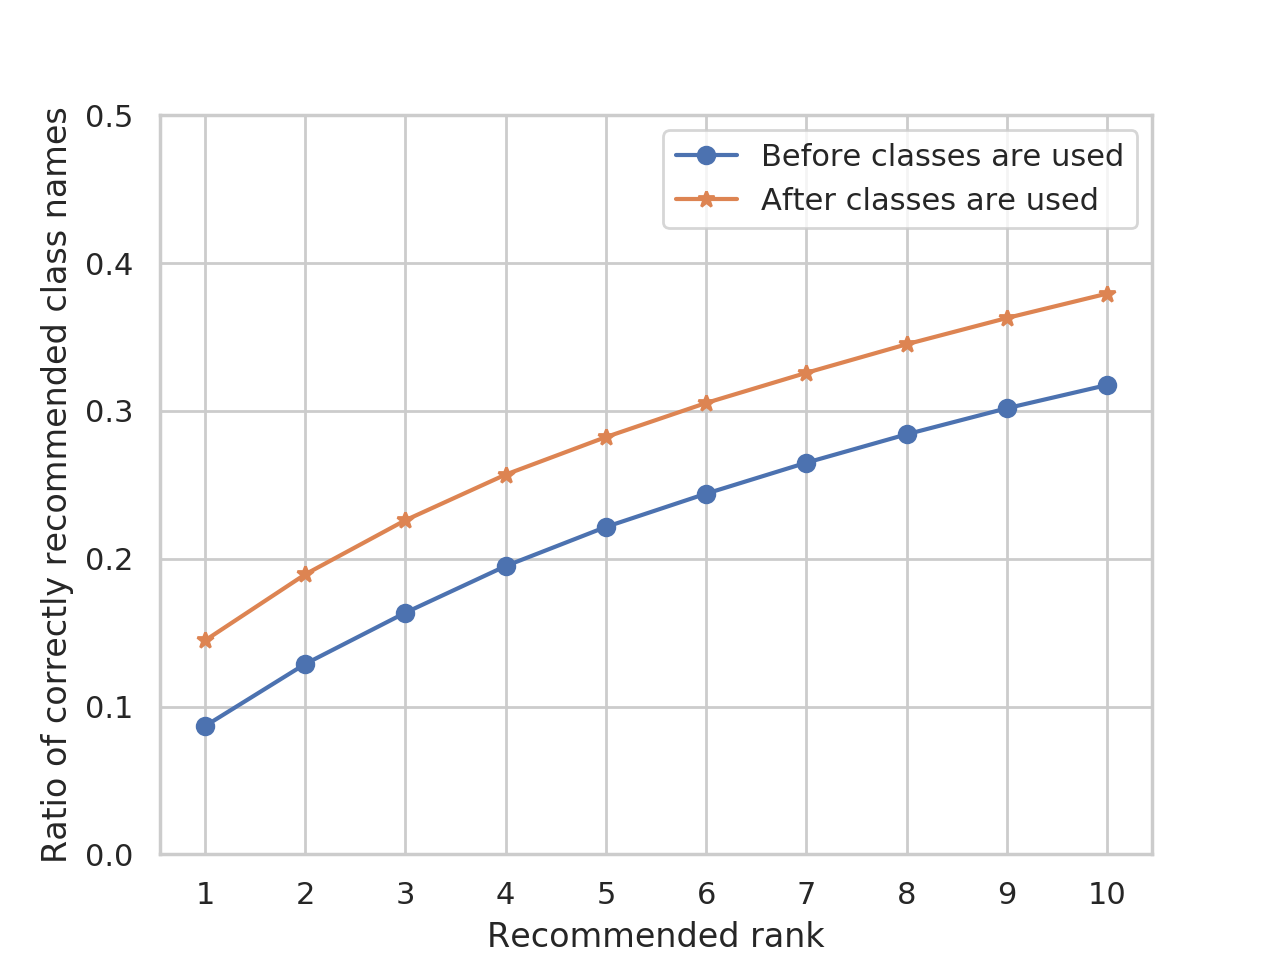

In [11]:
%matplotlib notebook
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
    
x = [i+1 for i in range(10)]
before = np.cumsum(result_success_before)
after = np.cumsum(result_success_after)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, before, label='Before classes are used', marker='o')
ax.plot(x, after, label='After classes are used', marker='*')

ax.legend()
ax.set_xlabel("Recommended rank")
ax.set_ylabel("Ratio of correctly recommended class names")
ax.set_ylim(0, 0.5)

plt.xticks(np.arange(1, 10+1, 1))

plt.show()
# fig.savefig('result.pdf')

### Experiment 3

<IPython.core.display.Javascript object>


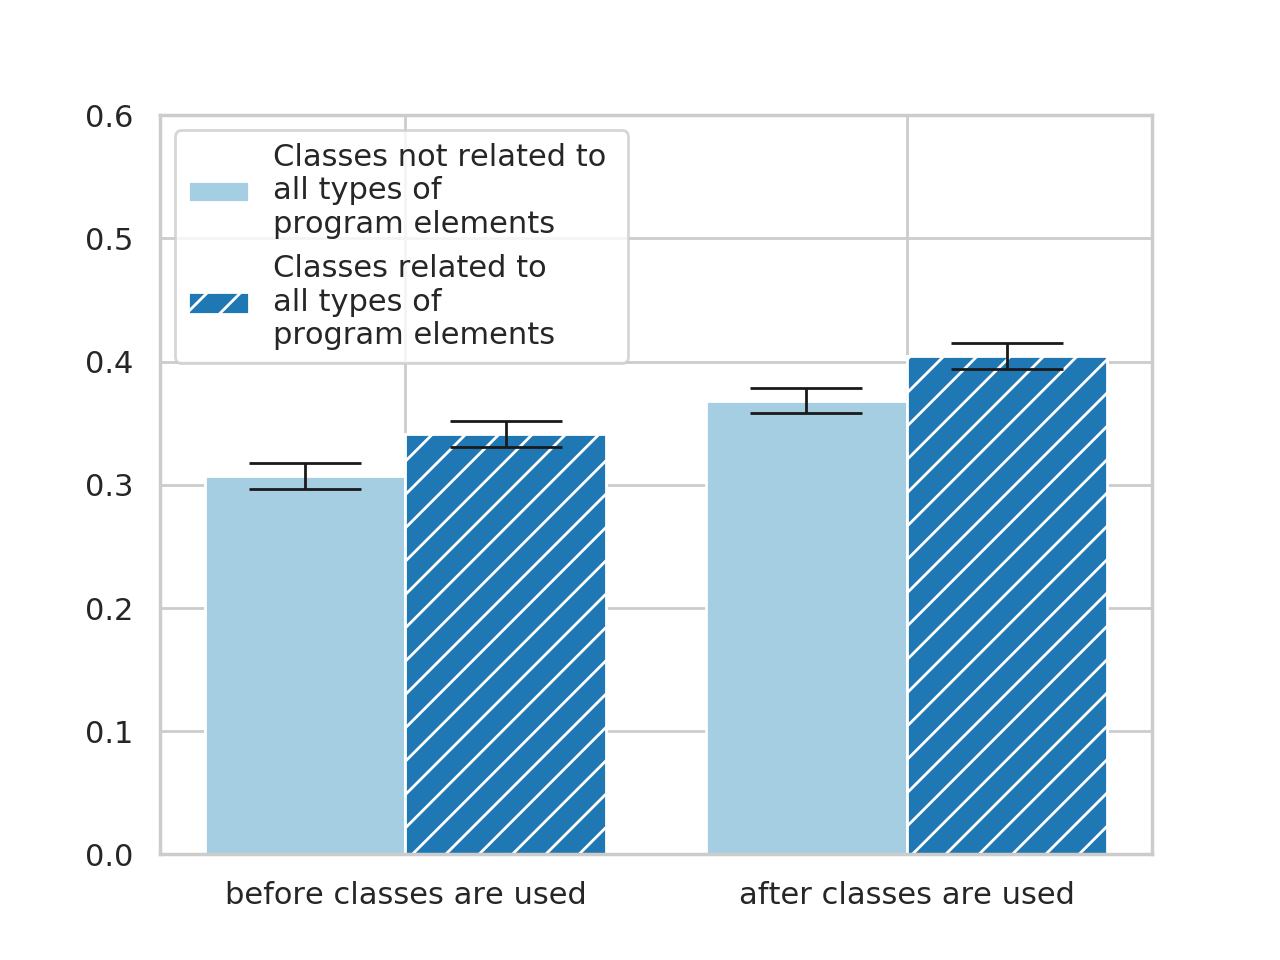

In [10]:
%matplotlib notebook
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

x = np.array(['before classes are used', 'after classes are used'])
x_position = np.arange(len(x))

# before
ratio_if_related_not_all_before = np.array(success_if_related_not_all_before)
ratio_if_related_all_before = np.array(success_if_related_all_before)

ratio_if_related_not_all_before_mu = ratio_if_related_not_all_before.mean()
ratio_if_related_all_before_mu = ratio_if_related_all_before.mean()
ratio_if_related_not_all_before_sd = ratio_if_related_not_all_before.std()
ratio_if_related_all_before_sd = ratio_if_related_all_before.std()

# after
ratio_if_related_not_all_after = np.array(success_if_related_not_all_after)
ratio_if_related_all_after = np.array(success_if_related_all_after)

ratio_if_related_not_all_after_mu = ratio_if_related_not_all_after.mean()
ratio_if_related_all_after_mu = ratio_if_related_all_after.mean()
ratio_if_related_not_all_after_sd = ratio_if_related_not_all_after.std()
ratio_if_related_all_after_sd = ratio_if_related_all_after.std()

# ---

y_not_related_all = np.array([ratio_if_related_not_all_before_mu, ratio_if_related_not_all_after_mu])
e_not_related_all = np.array([ratio_if_related_not_all_before_sd, ratio_if_related_not_all_before_sd])

y_related_all = np.array([ratio_if_related_all_before_mu, ratio_if_related_all_after_mu])
e_related_all = np.array([ratio_if_related_all_before_sd, ratio_if_related_all_after_sd])

error_bar_set = dict(lw = 1, capthick = 1, capsize = 20)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(x_position, y_not_related_all, yerr = e_not_related_all, error_kw=error_bar_set, width=0.4, label='Classes not related to \nall types of \nprogram elements')
ax.bar(x_position + 0.4, y_related_all, yerr = e_related_all, error_kw=error_bar_set, width=0.4, label='Classes related to \nall types of \nprogram elements', hatch="//")
ax.legend(loc="upper left")
ax.set_xticks(x_position + 0.2)
ax.set_xticklabels(x)
ax.set_ylim([0.0,0.6])

plt.show()
# fig.savefig('change-if-own-all-types.png')
